In [1]:
#import
import pandas as pd
import numpy as np
import scipy.io as sio
import os
import h5py
from datetime import *
%matplotlib inline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
myfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=10)
sns.set(font=myfont.get_name(),style="whitegrid",palette="muted",color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.regression.linear_model import OLS
import random
from scipy import stats
from scipy.optimize import least_squares
import copy
import math
from sklearn.neighbors import KernelDensity
import scipy.stats as st
import statsmodels as sm

In [2]:
#full_data
os.chdir(r'C:/Users/bj/Desktop/刘泽丹/Code/')
full = pd.read_csv('full_data_for_generator_from_db.csv')
full.columns = [int(i) for i in full.columns]
full[4] = [int(str(date.fromordinal(i-366)).replace('-','')) for i in full[4]]
full.set_index([0,4],inplace=True)
full_nonright = pd.read_csv('full_data_for_mission.csv')
full_nonright.columns = [int(i) for i in full_nonright.columns]
full_nonright[4] = [int(str(date.fromordinal(int(i)-366)).replace('-','')) for i in full_nonright[4]]
full_nonright.set_index([0,4],inplace = True)
return_info = pd.read_csv('full_data.csv')
return_info.set_index(['S_INFO_WINDCODE','TRADE_DT'],inplace=True)

In [3]:
def how_many_week_date_between(now_date,future_date):
    flag = 0
    if now_date > future_date:
        flag = 1
        now_date,future_date = future_date,now_date
    year = int(now_date[:4])
    month = int(now_date[4:6])
    day = int(now_date[6:])
    now = date(year,month,day)
    year = int(future_date[:4])
    month = int(future_date[4:6])
    day = int(future_date[6:])
    future = date(year,month,day)
    days = 0
    while(now<future):
        now = now + timedelta(days=1)
        if now.isoweekday() == 6 or now.isoweekday() == 7:
            pass
        elif now == date(2018,1,1) or now == date(2018,2,15) or now == date(2018,2,16) or now == date(2018,2,19)\
            or now == date(2018,2,20) or now == date(2018,2,21) or now == date(2018,4,5) or now == date(2018,4,6)\
            or now == date(2018,4,30) or now == date(2018,5,1) or now == date(2018,6,18) or now == date(2018,9,24)\
            or now == date(2018,10,1) or now == date(2018,10,2) or now == date(2018,10,3) or now == date(2018,10,4)\
            or now == date(2018,10,5) or now == date(2018,12,31) or now == date(2019,1,1) or now == date(2019,2,4)\
            or now == date(2019,2,5) or now == date(2019,2,6) or now == date(2019,2,7) or now == date(2019,2,8)\
            or now == date(2019,2,9) or now == date(2019,2,10) or now == date(2019,4,5) or now == date(2019,5,1)\
            or now == date(2019,6,7) or now == date(2019,9,13) or now == date(2019,10,1) or now == date(2019,10,2)\
            or now == date(2019,10,3) or now == date(2019,10,4) or now == date(2019,10,5) or now == date(2019,10,6)\
            or now == date(2019,10,7):
            pass
        else:
            days += 1
    if flag == 1:
        days = -days
    return days
def get_n_week_date_before(now_date,days=1):
    year = int(now_date[:4])
    month = int(now_date[4:6])
    day = int(now_date[6:])
    today = date(year,month,day)
    while(days>0):
        today = today - timedelta(days=1)
        if today.isoweekday() == 6 or today.isoweekday() == 7:
            pass
        elif today == date(2018,1,1) or today == date(2018,2,15) or today == date(2018,2,16) or today == date(2018,2,19)\
            or today == date(2018,2,20) or today == date(2018,2,21) or today == date(2018,4,5) or today == date(2018,4,6)\
            or today == date(2018,4,30) or today == date(2018,5,1) or today == date(2018,6,18) or today == date(2018,9,24)\
            or today == date(2018,10,1) or today == date(2018,10,2) or today == date(2018,10,3) or today == date(2018,10,4)\
            or today == date(2018,10,5) or today == date(2018,12,31) or today == date(2019,1,1) or today == date(2019,2,4)\
            or today == date(2019,2,5) or today == date(2019,2,6) or today == date(2019,2,7) or today == date(2019,2,8)\
            or today == date(2019,2,9) or today == date(2019,2,10) or today == date(2019,4,5) or today == date(2019,5,1)\
            or today == date(2019,6,7) or today == date(2019,9,13) or today == date(2019,10,1) or today == date(2019,10,2)\
            or today == date(2019,10,3) or today == date(2019,10,4) or today == date(2019,10,5) or today == date(2019,10,6)\
            or today == date(2019,10,7):
            pass
        else:
            days -= 1
    year = str(today.year)
    if today.month < 10:
        month = '0' + str(today.month)
    else:
        month = str(today.month)
    if today.day < 10:
        day = '0' + str(today.day)
    else:
        day = str(today.day)
    return year + month + day
def get_n_week_date_after(now_date,days=1):
    year = int(now_date[:4])
    month = int(now_date[4:6])
    day = int(now_date[6:])
    today = date(year,month,day)
    while(days>0):
        today = today + timedelta(days=1)
        if today.isoweekday() == 6 or today.isoweekday() == 7:
            pass
        elif today == date(2018,1,1) or today == date(2018,2,15) or today == date(2018,2,16) or today == date(2018,2,19)\
            or today == date(2018,2,20) or today == date(2018,2,21) or today == date(2018,4,5) or today == date(2018,4,6)\
            or today == date(2018,4,30) or today == date(2018,5,1) or today == date(2018,6,18) or today == date(2018,9,24)\
            or today == date(2018,10,1) or today == date(2018,10,2) or today == date(2018,10,3) or today == date(2018,10,4)\
            or today == date(2018,10,5) or today == date(2018,12,31) or today == date(2019,1,1) or today == date(2019,2,4)\
            or today == date(2019,2,5) or today == date(2019,2,6) or today == date(2019,2,7) or today == date(2019,2,8)\
            or today == date(2019,2,9) or today == date(2019,2,10) or today == date(2019,4,5) or today == date(2019,5,1)\
            or today == date(2019,6,7) or today == date(2019,9,13) or today == date(2019,10,1) or today == date(2019,10,2)\
            or today == date(2019,10,3) or today == date(2019,10,4) or today == date(2019,10,5) or today == date(2019,10,6)\
            or today == date(2019,10,7):
            pass
        else:
            days -= 1
    year = str(today.year)
    if today.month < 10:
        month = '0' + str(today.month)
    else:
        month = str(today.month)
    if today.day < 10:
        day = '0' + str(today.day)
    else:
        day = str(today.day)
    return year + month + day

In [4]:
from WindPy import *
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [5]:
first_date = '2017-01-02'
last_date = '2019-01-22'
annualize_factor = 250
profitreturn_factor = 0.4

In [6]:
Rdata = w.edb("M0017138", first_date, last_date, "Fill=Previous")
R = pd.DataFrame(Rdata.Data[0], index=Rdata.Times, columns=['R'])['R']
R.index = [int(str(i).replace('-', '')) for i in R.index]
R.to_csv('Shibor_overnight.csv')

In [7]:
data = w.wsd("000905.SH", "pct_chg", first_date, last_date, "PriceAdj=B")
zz500 = pd.DataFrame(data.Data[0], index=data.Times, columns=['zz500'])['zz500']
zz500.index = [int(str(i).replace('-', '')) for i in zz500.index]
zz500.to_csv('zz500.csv')

In [8]:
R = pd.read_csv('Shibor_overnight.csv',header=None,index_col=0)[1]
zz500 = pd.read_csv('zz500.csv', index_col=0, header=None)[1]

In [9]:
def get_history_volatility(stock, check_date, window = 20):
    sub = full.xs(stock,level = 0)[8]
    pct_chg = (sub/sub.shift(1) - 1)
    pct_chg = pct_chg[pct_chg.index <= check_date].iloc[-window:]
    return pct_chg.std() * np.sqrt(annualize_factor)
def get_dividendyield(stock, check_date):
    return dividendyield.loc[check_date,stock]/100
def get_history_ShiborON(check_date):
    return R.loc[check_date]/100

In [10]:
def European_option(type_of_option, S_0, K, sigma, q, r, T, percent = False):
    d_1 = (np.log(S_0/K) + (r - q + (sigma ** 2)/2) * T) / (sigma * np.sqrt(T))
    d_2 = (np.log(S_0/K) + (r - q - (sigma ** 2)/2) * T) / (sigma * np.sqrt(T))
    percent = (S_0 if percent else 1)
    if type_of_option == 'call':
        price = (S_0 * np.exp( -q * T) * stats.norm.cdf(d_1) - K * np.exp( -r * T) * stats.norm.cdf(d_2))/percent
        delta = np.exp( -q * T) * stats.norm.cdf(d_1)
        gamma = (stats.norm.pdf(d_1) * np.exp( -q * T)) / (S_0 * sigma * np.sqrt(T))
        vega = S_0 * np.sqrt(T) * stats.norm.pdf(d_1) * np.exp( -q * T) /100
        theta = ((-S_0 * stats.norm.pdf(d_1) * sigma * np.exp( -q * T)) / (2 * np.sqrt(T)) +\
                     q * S_0 * stats.norm.cdf(d_1) * np.exp( -q * T) - r * K * np.exp( -r * T) * stats.norm.cdf(d_2)) / 365
        rho = K * T * np.exp( -r * T) * stats.norm.cdf(d_2) /100
    elif type_of_option == 'put':
        price = (K * np.exp( -r * T) * stats.norm.cdf( -d_2) - S_0 * np.exp( -q * T) * stats.norm.cdf( -d_1))/percent
        delta = np.exp( -q * T) * (stats.norm.cdf(d_1) - 1)
        gamma = (stats.norm.pdf(d_1) * np.exp( -q * T)) / (S_0 * sigma * np.sqrt(T))
        vega = S_0 * np.sqrt(T) * stats.norm.pdf(d_1) * np.exp( -q * T) /100
        theta = ((-S_0 * stats.norm.pdf( -d_1) * sigma * np.exp( -q * T)) / (2 * np.sqrt(T)) -\
                     q * S_0 * stats.norm.cdf( -d_1) * np.exp( -q * T) + r * K * np.exp( -r * T) * stats.norm.cdf( -d_2)) / 365
        rho = -K * T * np.exp( -r * T) * stats.norm.cdf( -d_2) /100
    result = {'price':price, 'delta':delta, 'gamma':gamma, 'vega':vega, 'theta':theta, 'rho':rho}
    return result

In [11]:
def implied_volatility(known_price, type_of_option, S_0, K, q, r, T, percent = False):
    ori_low = 0.05
    ori_high = 3
    while(True):
        volatility_cycle = np.linspace(ori_low,ori_high,10)
        step = volatility_cycle[1] - volatility_cycle[0]
        best_diff = np.inf
        for volatility in volatility_cycle:
            price_diff = np.abs(European_option(type_of_option, S_0, K, volatility, q, r, T, percent)['price'] - known_price)
            if price_diff < best_diff:
                best_diff = price_diff
                new_low = max(ori_low,volatility - step)
                new_high = min(ori_high,volatility + step)
            if price_diff < 1e-10:
                return {'know_price':known_price,'type_of_option':type_of_option,'implied_volatility':(new_low+new_high)/2}
        ori_low = new_low
        ori_high = new_high

In [12]:
def implied_drift(known_price, type_of_option, S_0, K, sigma, q, T, percent = False):
    ori_low = 0.01
    ori_high = 1000
    while(True):
        r_cycle = np.linspace(ori_low,ori_high,10)
        step = r_cycle[1] - r_cycle[0]
        best_diff = np.inf
        for r in r_cycle:
            price_diff = np.abs(European_option(type_of_option, S_0, K, sigma, q, r, T, percent)['price'] - known_price)
            if price_diff < best_diff:
                best_diff = price_diff
                new_low = max(ori_low,r - step)
                new_high = min(ori_high,r + step)
            if price_diff < 1e-10 or np.isclose((new_low+new_high)/2,(ori_low+ori_high)/2):
                return {'know_price':known_price,'type_of_option':type_of_option,'implied_r':(new_low+new_high)/2}
        ori_low = new_low
        ori_high = new_high

In [13]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',None)

In [ ]:
start_date = 20190122
start_date_r = R.xs(start_date)/100
ask_price_data_0122 = pd.read_excel('0122报价.xlsx',index_col=0)
ask_price_data_0122.index = [int(i[:6]) for i in ask_price_data_0122.index]
ask_price_data_0122['open'] = full_nonright.xs(start_date,level = 4).loc[ask_price_data_0122.index][8]
ask_price_data_0122['101'] = ask_price_data_0122['open'] * 1.01
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    r = start_date_r
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_volatility(known_price, 'call', S_0, K_101, q, r, T, True)['implied_volatility']
    except:
        return
ask_price_data_0122['两周隐含波动率'] = ask_price_data_0122.apply(process,args=['两周',],axis=1)
def process(df, window):
    return get_history_volatility(df.name,start_date,window)
ask_price_data_0122['30天真实波动率'] = ask_price_data_0122.apply(process,args=[30,],axis=1)
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    sigma = df.xs('30天真实波动率')
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_drift(known_price, 'call', S_0, K_101, sigma, q, T, True)['implied_r']
    except:
        return
ask_price_data_0122['两周隐含偏移'] = ask_price_data_0122.apply(process,args=['两周',],axis=1)
ask_price_data_0122['两周倍率'] = ask_price_data_0122['两周隐含波动率']/ask_price_data_0122['30天真实波动率']

In [ ]:
start_date = 20190121
start_date_r = R.xs(start_date)/100
ask_price_data_0121 = pd.read_excel('0121报价.xlsx',index_col=0)
ask_price_data_0121.index = [int(i[:6]) for i in ask_price_data_0121.index]
ask_price_data_0121['open'] = full_nonright.xs(start_date,level = 4).loc[ask_price_data_0121.index][8]
ask_price_data_0121['101'] = ask_price_data_0121['open'] * 1.01
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    r = start_date_r
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_volatility(known_price, 'call', S_0, K_101, q, r, T, True)['implied_volatility']
    except:
        return
ask_price_data_0121['两周隐含波动率'] = ask_price_data_0121.apply(process,args=['两周',],axis=1)
def process(df, window):
    return get_history_volatility(df.name,start_date,window)
ask_price_data_0121['30天真实波动率'] = ask_price_data_0121.apply(process,args=[30,],axis=1)
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    sigma = df.xs('30天真实波动率')
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_drift(known_price, 'call', S_0, K_101, sigma, q, T, True)['implied_r']
    except:
        return
ask_price_data_0121['两周隐含偏移'] = ask_price_data_0121.apply(process,args=['两周',],axis=1)
ask_price_data_0121['两周倍率'] = ask_price_data_0121['两周隐含波动率']/ask_price_data_0121['30天真实波动率']

In [58]:
idx = pd.IndexSlice
average_price_0109 = \
full_nonright.loc[idx[:,[20190109,20190110,20190111,20190114,20190115,20190116,20190117,20190118,20190121,20190122]],:].groupby(level=0).sum()[10]/\
full_nonright.loc[idx[:,[20190109,20190110,20190111,20190114,20190115,20190116,20190117,20190118,20190121,20190122]],:].groupby(level=0).sum()[13]
average_price_0109_second = \
full_nonright.loc[idx[:,[20190116,20190117,20190118,20190121,20190122]],:].groupby(level=0).sum()[10]/\
full_nonright.loc[idx[:,[20190116,20190117,20190118,20190121,20190122]],:].groupby(level=0).sum()[13]

In [59]:
start_date = 20190109
start_date_r = R.xs(start_date)/100
end_date = 20190122
ask_price_data_0109 = pd.read_excel('0109报价.xlsx',index_col=0)
ask_price_data_0109.index = [int(i[:6]) for i in ask_price_data_0109.index]
ask_price_data_0109['open'] = full_nonright.xs(start_date,level = 4).loc[ask_price_data_0109.index][5]
ask_price_data_0109['close'] = full_nonright.xs(end_date,level = 4).loc[ask_price_data_0109.index][8]
ask_price_data_0109['ave'] = average_price_0109.loc[ask_price_data_0109.index]
ask_price_data_0109['ave_second'] = average_price_0109_second.loc[ask_price_data_0109.index]
ask_price_data_0109['101'] = ask_price_data_0109['open'] * 1.01
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    r = start_date_r
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_volatility(known_price, 'call', S_0, K_101, q, r, T, True)['implied_volatility']
    except:
        return
ask_price_data_0109['两周隐含波动率'] = ask_price_data_0109.apply(process,args=['两周',],axis=1)
def process(df, window):
    return get_history_volatility(df.name,start_date,window)
ask_price_data_0109['30天真实波动率'] = ask_price_data_0109.apply(process,args=[30,],axis=1)
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    sigma = df.xs('30天真实波动率')
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_drift(known_price, 'call', S_0, K_101, sigma, q, T, True)['implied_r']
    except:
        return
ask_price_data_0109['两周隐含偏移'] = ask_price_data_0109.apply(process,args=['两周',],axis=1)
ask_price_data_0109['两周倍率'] = ask_price_data_0109['两周隐含波动率']/ask_price_data_0109['30天真实波动率']

In [60]:
ask_price_data_0109['p&l'] = (ask_price_data_0109['close']/ask_price_data_0109['open'] - 1 - ask_price_data_0109['两周']).sort_values()

In [61]:
idx = pd.IndexSlice
average_price_1225 = \
full_nonright.loc[idx[:,[20181225,20181226,20181227,20181228,20190102,20190103,20190104,20190107,20190108,20190109]],:].groupby(level=0).sum()[10]/\
full_nonright.loc[idx[:,[20181225,20181226,20181227,20181228,20190102,20190103,20190104,20190107,20190108,20190109]],:].groupby(level=0).sum()[13]
average_price_1225_second = \
full_nonright.loc[idx[:,[20190103,20190104,20190107,20190108,20190109]],:].groupby(level=0).sum()[10]/\
full_nonright.loc[idx[:,[20190103,20190104,20190107,20190108,20190109]],:].groupby(level=0).sum()[13]

In [62]:
start_date = 20181225
start_date_r = R.xs(start_date)/100
end_date = 20190109
ask_price_data_1225 = pd.read_excel('1225报价.xlsx',index_col=0)
ask_price_data_1225.index = [int(i[:6]) for i in ask_price_data_1225.index]
ask_price_data_1225['open'] = full_nonright.xs(start_date,level = 4).loc[ask_price_data_1225.index][5]
ask_price_data_1225['close'] = full_nonright.xs(end_date,level = 4).loc[ask_price_data_1225.index][8]
ask_price_data_1225['ave'] = average_price_1225.loc[ask_price_data_1225.index]
ask_price_data_1225['ave_second'] = average_price_1225_second.loc[ask_price_data_1225.index]
ask_price_data_1225['101'] = ask_price_data_1225['open'] * 1.01
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    r = start_date_r
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_volatility(known_price, 'call', S_0, K_101, q, r, T, True)['implied_volatility']
    except:
        return
ask_price_data_1225['两周隐含波动率'] = ask_price_data_1225.apply(process,args=['两周',],axis=1)
def process(df, window):
    return get_history_volatility(df.name,start_date,window)
ask_price_data_1225['30天真实波动率'] = ask_price_data_1225.apply(process,args=[30,],axis=1)
def process(df,period):
    if period not in df.index:
        return
    known_price = df.xs(period)
    S_0 = df.xs('open')
    K_101 = df.xs('101')
    q = 0
    sigma = df.xs('30天真实波动率')
    if period == '两周':
        T = 10/250
    elif period == '一个月':
        T = 21/250
    elif period == '两个月':
        T = 42/250
    elif period == '三个月':
        T = 63/250
    try:
        return implied_drift(known_price, 'call', S_0, K_101, sigma, q, T, True)['implied_r']
    except:
        return
ask_price_data_1225['两周隐含偏移'] = ask_price_data_1225.apply(process,args=['两周',],axis=1)
ask_price_data_1225['两周倍率'] = ask_price_data_1225['两周隐含波动率']/ask_price_data_1225['30天真实波动率']

In [63]:
ask_price_data_1225['p&l'] = (ask_price_data_1225['close']/ask_price_data_1225['open'] - 1 - ask_price_data_1225['两周']).sort_values()

In [95]:
Adjusted_Amihud_score = pd.read_csv('Adjusted_Amihud_score.csv',index_col=0)
Adjusted_Amihud_score.columns = [int(i) for i in Adjusted_Amihud_score.columns]
EL_score = pd.read_csv('EL_score.csv',index_col=0)
EL_score.columns = [int(i) for i in EL_score.columns]
mkt_cap_ard = pd.read_csv('mkt_cap_ard.csv',index_col=0)
mkt_cap_ard.columns = [int(i) for i in mkt_cap_ard.columns]

In [67]:
ask_price_data_1225['history_EL'] = EL_score[EL_score.index<20181225].mean()
ask_price_data_1225['history_AA'] = Adjusted_Amihud_score[Adjusted_Amihud_score.index<20181225].mean()
ask_price_data_0109['history_EL'] = EL_score[EL_score.index<20190109].mean()
ask_price_data_0109['history_AA'] = Adjusted_Amihud_score[Adjusted_Amihud_score.index<20190109].mean()

(0, 0.1)

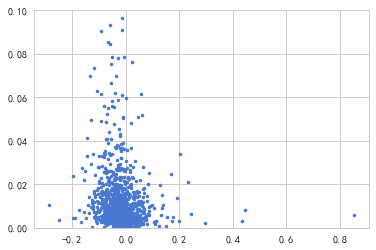

In [72]:
plt.plot(ask_price_data_1225['p&l'],ask_price_data_1225['history_EL'],'.')
plt.ylim(0,0.1)

In [166]:
data = pd.read_excel('已到期账户0119.xlsx')

In [167]:
EL_score_list = []
AA_score_list = []
EL_score_std_list = []
AA_score_std_list = []
mkt_cap_ard_list = []
for i in data.index:
    stock = data.loc[i,'股票代码']
    start_date = data.loc[i,'收款日期']
    EL_score_list.append(EL_score[stock][EL_score[stock].index<start_date].mean())
    AA_score_list.append(Adjusted_Amihud_score[stock][Adjusted_Amihud_score[stock].index<start_date].mean())
    EL_score_std_list.append(EL_score[stock][EL_score[stock].index<start_date].std())
    AA_score_std_list.append(Adjusted_Amihud_score[stock][Adjusted_Amihud_score[stock].index<start_date].std())
    mkt_cap_ard_list.append(mkt_cap_ard[stock][mkt_cap_ard[stock].index<start_date].iloc[-5:].mean())

In [168]:
data['EL'] = EL_score_list
data['AA'] = AA_score_list
data['ELstd'] = EL_score_std_list
data['AAstd'] = AA_score_std_list
data['MCA'] = mkt_cap_ard_list

In [169]:
data['完成净利润'] = [i if i <=0 else 0.6 * i for i in data['净利润']]
data['名义本金'] = data['保证金']/0.15
data['持有时间'] = [1+how_many_week_date_between(str(data.xs(i).xs('收款日期')), str(data.xs(i).xs('出金日期'))) for i in data.index]
((data['完成净利润']/data['保证金'])/data['持有时间']).mean()*250

1.9698536491564036

In [163]:
sub = data[(data['名义本金']<=750000)]

In [164]:
sub['完成净利润'] = [i if i <=0 else 0.6 * i for i in sub['净利润']]
sub['持有时间'] = [1+how_many_week_date_between(str(sub.xs(i).xs('收款日期')), str(sub.xs(i).xs('出金日期'))) for i in sub.index]
((sub['完成净利润']/sub['保证金'])/sub['持有时间']).mean()*250

2.6919737589068986

In [165]:
len(sub)/len(data)

0.8037383177570093

In [171]:
data.corr()

,股票代码,收款日期,收款金额,付款日期,付款金额,南华虚值,出金日期,兑付金额,净利润,保证金,合计款,EL,AA,ELstd,AAstd,MCA,完成净利润,名义本金,持有时间
股票代码,1.000000,0.135992,-0.010165,0.135992,-0.011673,-0.022695,-0.007461,-0.137360,0.097001,0.150830,0.153213,-0.088143,-0.004447,-0.146512,-0.063073,0.378793,0.121256,0.150830,0.008102
收款日期,0.135992,1.000000,-0.088630,1.000000,-0.093904,-0.090564,0.343145,0.077063,-0.115999,-0.004445,-0.070616,-0.042459,-0.025844,-0.032299,-0.011238,-0.126636,-0.087394,-0.004445,-0.362082
收款金额,-0.010165,-0.088630,1.000000,-0.088630,0.999875,0.998523,0.059871,0.009440,0.587656,0.744061,0.819579,-0.029860,-0.078781,-0.023153,-0.062030,-0.103087,0.439534,0.744061,0.203031
付款日期,0.135992,1.000000,-0.088630,1.000000,-0.093904,-0.090564,0.343145,0.077063,-0.115999,-0.004445,-0.070616,-0.042459,-0.025844,-0.032299,-0.011238,-0.126636,-0.087394,-0.004445,-0.362082
付款金额,-0.011673,-0.093904,0.999875,-0.093904,1.000000,0.998766,0.046806,0.005050,0.591333,0.739027,0.818505,-0.030202,-0.079247,-0.023476,-0.062887,-0.104052,0.443235,0.739027,0.209057
南华虚值,-0.022695,-0.090564,0.998523,-0.090564,0.998766,1.000000,0.057460,0.002998,0.593720,0.707051,0.799433,-0.023287,-0.073706,-0.014295,-0.057343,-0.119622,0.445687,0.707051,0.216449
出金日期,-0.007461,0.343145,0.059871,0.343145,0.046806,0.057460,1.000000,0.235490,-0.155239,0.095367,-0.029656,0.163265,0.144312,0.153876,0.130782,-0.008649,-0.163413,0.095367,-0.308304
兑付金额,-0.137360,0.077063,0.009440,0.077063,0.005050,0.002998,0.235490,1.000000,-0.802888,0.110094,-0.398612,-0.052380,-0.041715,-0.050087,-0.048602,-0.017024,-0.889615,0.110094,-0.223663
净利润,0.097001,-0.115999,0.587656,-0.115999,0.591333,0.593720,-0.155239,-0.802888,1.000000,0.332907,0.797321,0.028267,-0.010371,0.031782,0.004925,-0.057612,0.981540,0.332907,0.309008
保证金,0.150830,-0.004445,0.744061,-0.004445,0.739027,0.707051,0.095367,0.110094,0.332907,1.000000,0.834562,-0.100179,-0.116867,-0.120724,-0.095683,0.104699,0.223018,1.000000,-0.052009


In [155]:
2e10

20000000000.0